complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, and interpreting model coefficients.

# Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [4]:
data = pd.read_csv(r"Dummy Data HSS.csv")

# EDA

In [5]:
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [7]:
data.shape

(4572, 5)

In [9]:
data[["TV", "Radio", "Social Media"]].describe()

,TV,Radio,Social Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


In [10]:
missing_sales = data.Sales.isna().mean()
missing_sales = round(missing_sales*100, 2)
print("Percentage of promotion missing Sales:" + str(missing_sales) + "%")

Percentage of promotion missing Sales:0.13%


In [11]:
data = data.dropna(subset = ["Sales"], axis = 0)

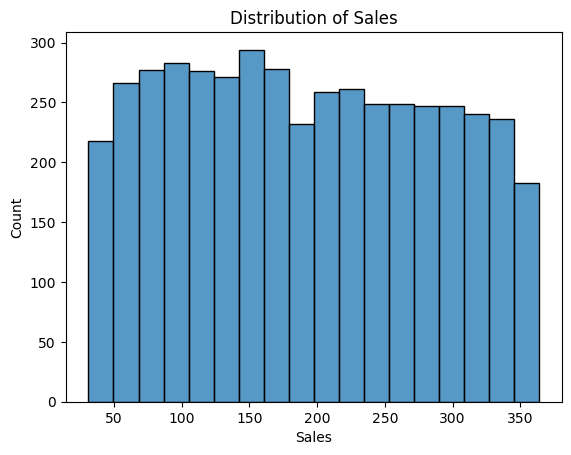

In [12]:
fig = sns.histplot(data["Sales"])
fig.set_title("Distribution of Sales");

# Model Building

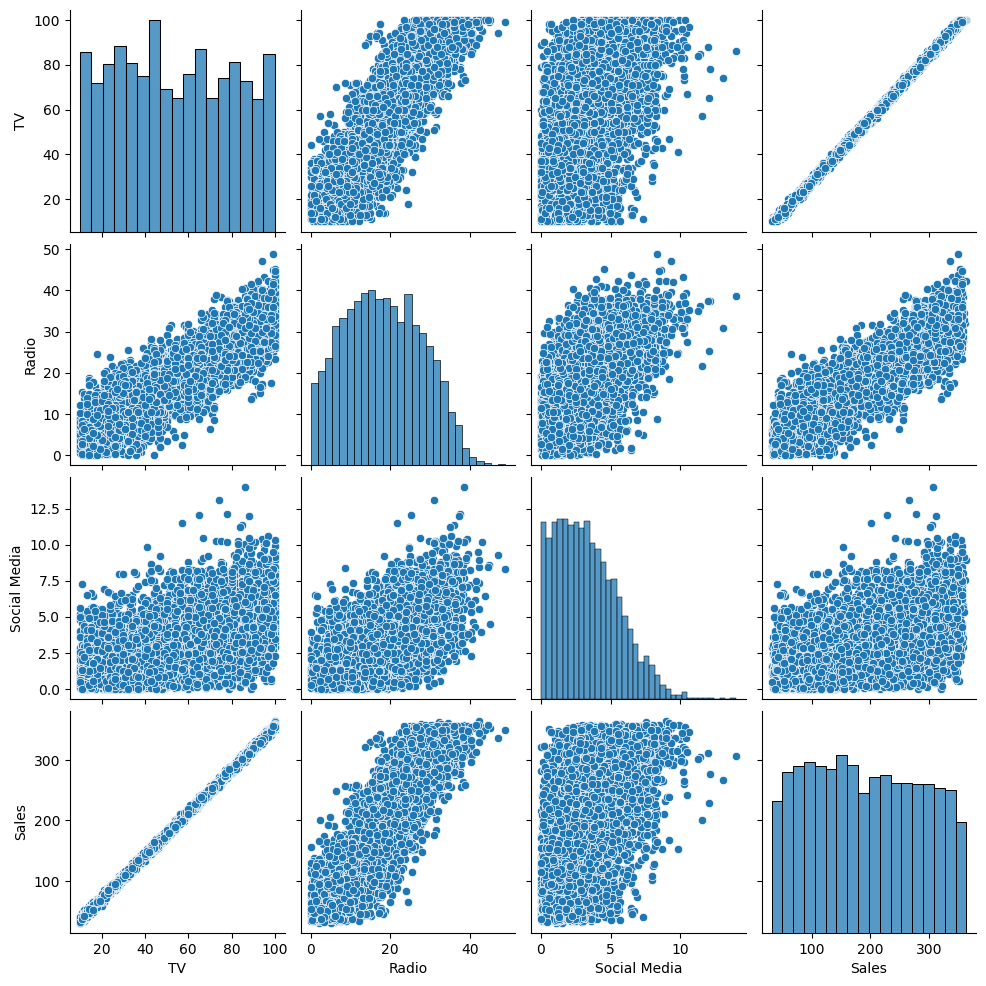

In [13]:
sns.pairplot(data);

In [14]:
ols_formula = "Sales ~ TV"
ols = ols(formula = ols_formula, data = data)
model = ols.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:07:22   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linearity 

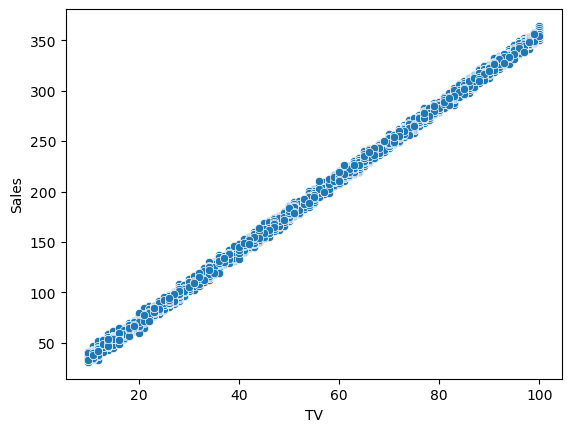

In [15]:
sns.scatterplot(x = data["TV"], y = data["Sales"]);

## Normality

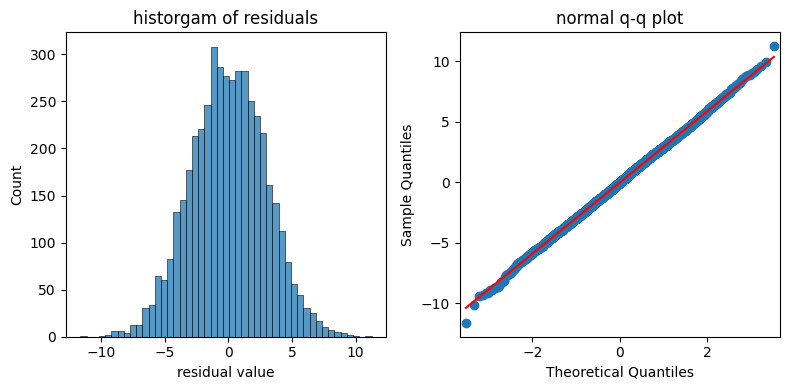

In [16]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8, 4))
sns.histplot(residuals, ax = axes[0])
axes[0].set_xlabel("residual value")
axes[0].set_title("historgam of residuals")
sm.qqplot(residuals, line = "s", ax = axes[1])
axes[1].set_title("normal q-q plot")
plt.tight_layout()
plt.show()

## Homoscedasticity

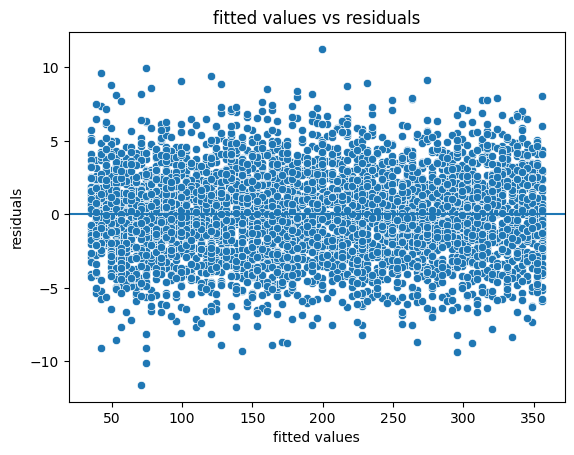

In [17]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("fitted values")
fig.set_ylabel("residuals")
fig.set_title("fitted values vs residuals")
fig.axhline(0)
plt.show()

# Results  

In [18]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:07:22   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""